In [1]:
from pylab import *
%matplotlib inline

In [24]:
def valueIteration(delta):
    myV = []
    V = [0 for i in range(10)]
    for k in range(100):
        nextCost = sum( [V[j]/10 for j in range(10)])
        V = [max(i+1, delta*nextCost) for i in range(10)]
        myV.append(V)
    print(V)
    return(array(myV))

[6.652173913043479, 6.652173913043479, 6.652173913043479, 6.652173913043479, 6.652173913043479, 6.652173913043479, 7, 8, 9, 10]
[9.082561218695993, 9.082561218695993, 9.082561218695993, 9.082561218695993, 9.082561218695993, 9.082561218695993, 9.082561218695993, 9.082561218695993, 9.082561218695993, 10]


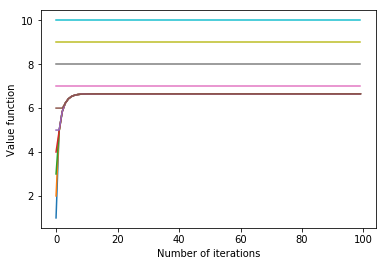

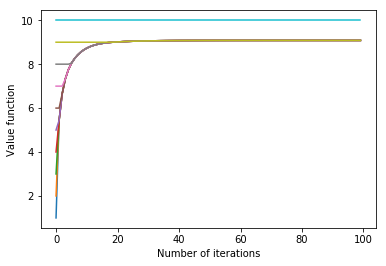

In [25]:
for delta in [0.9,0.99]:
    f = figure()
    plot(valueIteration(delta))
    ylabel('Value function')
    xlabel('Number of iterations')
    f.savefig('valueIteration{}.png'.format(int(100*delta)),bbox_inches='tight')

In [29]:
def matrix_from_policy(pi):
    # pi[i] = 0 means "draw again if we are in i"
    P = zeros([10,10])
    for i in range(10):
        if pi[i] == 0:
            for j in range(10):
                P[i,j] = 1/10.
    return(P)
def C_pi(pi):
    C = array([i+1 for i in range(10)])
    for i in range(10):
        if pi[i] == 0:
            C[i] = 0
    C.shape=(10,1)
    return(C)
def best_policy_from_valueFunction(V,delta):
    nextCost = sum( [V[j]/10 for j in range(10)])
    pi = [ (0 if i+1 < delta*nextCost else 1) for i in range(10)]
    return(pi)
    

In [31]:
def policyIteration(delta):
    V = array([0 for i in range(10)])

    for k in range(10):
        pi = best_policy_from_valueFunction(V,delta)
        P = matrix_from_policy(pi)
        M = matrix(inv(identity(10)-delta*P))
        print(transpose(V))
        if (V == M*C_pi(pi)).all():
            print('finished after {} iterations'.format(k))
            break
        V = M*C_pi(pi)
    return V

delta = 0.9
V_pi = policyIteration(delta)
V_vi = valueIteration(delta)[-1,:]

[0 0 0 0 0 0 0 0 0 0]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
[[ 6.328125  6.328125  6.328125  6.328125  5.        6.        7.
   8.        9.       10.      ]]
[[ 6.65217391  6.65217391  6.65217391  6.65217391  6.65217391  6.65217391
   7.          8.          9.         10.        ]]
finished after 3 iterations
[6.652173913043479, 6.652173913043479, 6.652173913043479, 6.652173913043479, 6.652173913043479, 6.652173913043479, 7, 8, 9, 10]


In [32]:
V_pi, V_vi

(matrix([[ 6.65217391],
         [ 6.65217391],
         [ 6.65217391],
         [ 6.65217391],
         [ 6.65217391],
         [ 6.65217391],
         [ 7.        ],
         [ 8.        ],
         [ 9.        ],
         [10.        ]]),
 array([ 6.65217391,  6.65217391,  6.65217391,  6.65217391,  6.65217391,
         6.65217391,  7.        ,  8.        ,  9.        , 10.        ]))